In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

os.chdir(r'C:\Users\zxuyuan\Downloads')

In [5]:
data = pd.read_stata('for-analysis-with-dummy(should drop).dta')

In [8]:
year_list = data['year'].unique()
print(year_list)

[2016 2017 2018 2019 2020 2021 2022]


In [14]:
groupby_treatment = pd.DataFrame()
for i in year_list:
    avg_income = data[data['year'] == i].groupby('treatment_yearx{}'.format(i - 2015))['income'].mean().reset_index()
    avg_income['year'] = i
    avg_income.columns = ['treatment', 'average_income', 'year']
    groupby_treatment = pd.concat([groupby_treatment, avg_income], ignore_index = True)

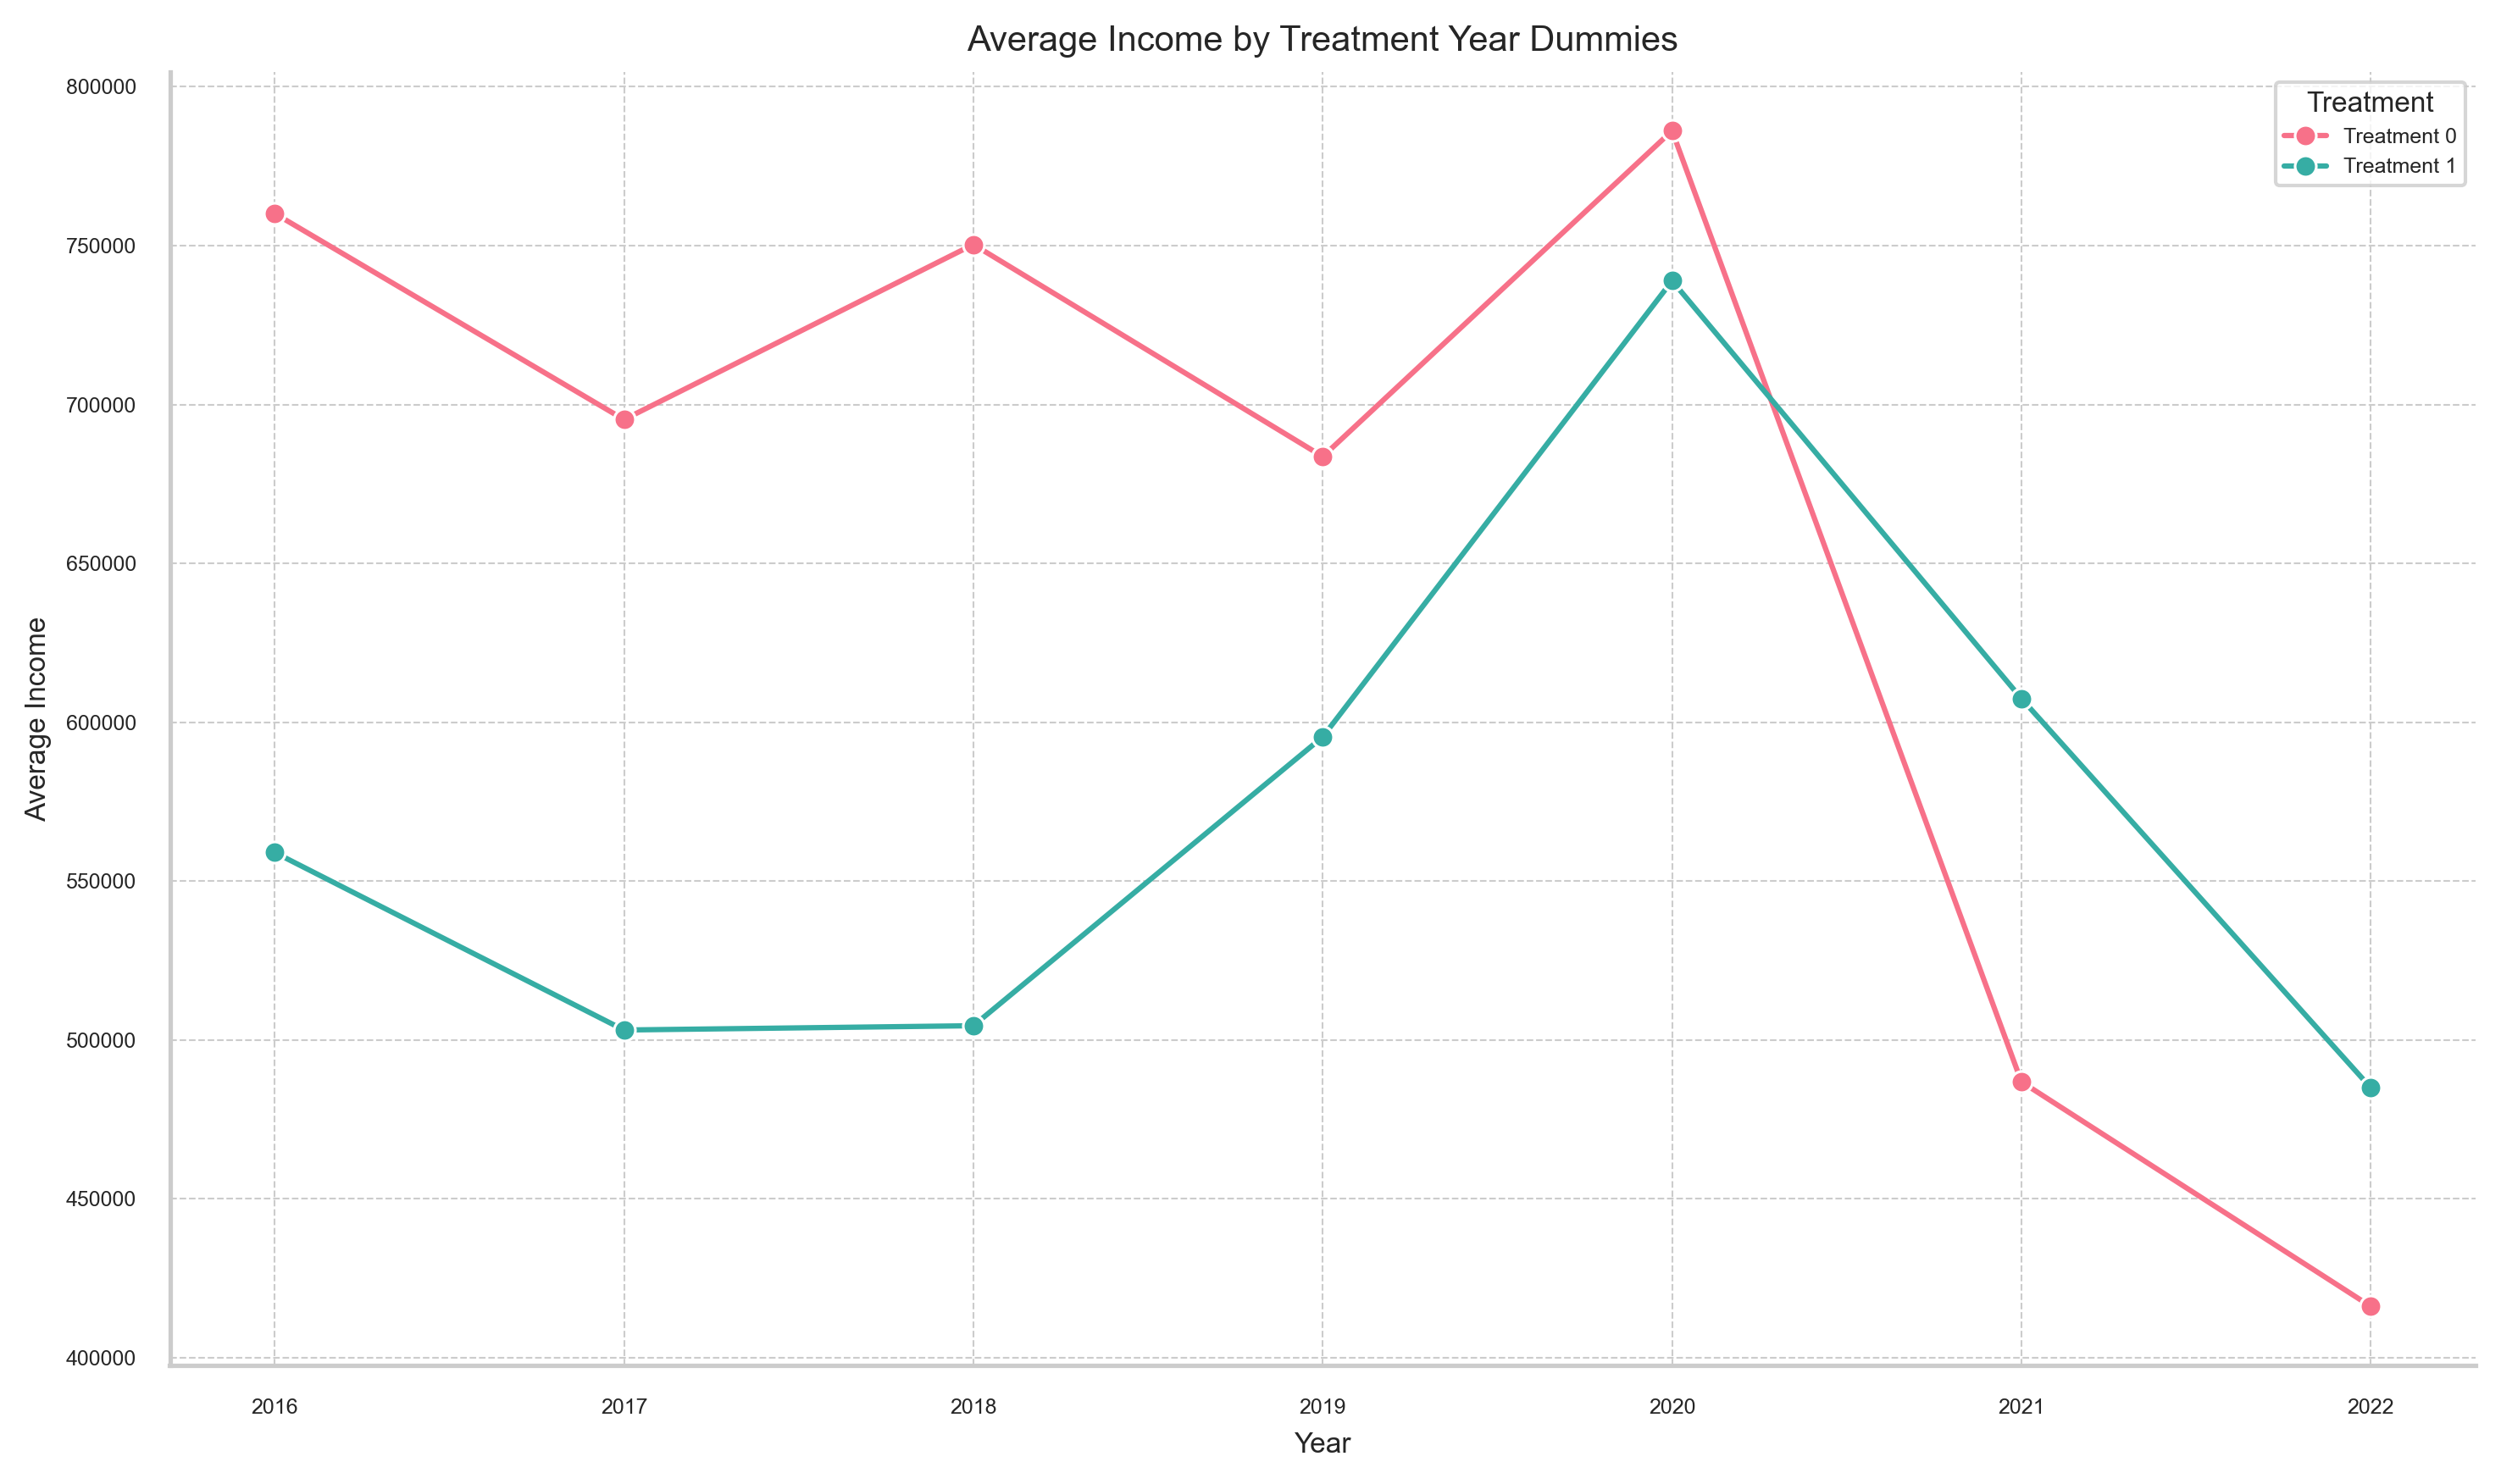

In [28]:
# Set font and style
plt.rc('font', family='Times New Roman', size=8)
sns.set(style="whitegrid")

# Plotting using seaborn
plt.figure(figsize=(10, 6), dpi = 300)

# Define a color palette
palette = sns.color_palette("husl", len(groupby_treatment['treatment'].unique()))

for i, treatment in enumerate(groupby_treatment['treatment'].unique()):
    treatment_data = groupby_treatment[groupby_treatment['treatment'] == treatment]
    sns.lineplot(x='year', y='average_income', data=treatment_data, marker='o', label=f'Treatment {int(treatment)}', color=palette[i])

# Customize the plot
plt.title('Average Income by Treatment Year Dummies', fontsize=10)
plt.xlabel('Year', fontsize=8)
plt.ylabel('Average Income', fontsize=8)
plt.legend(title='Treatment', fontsize=6, title_fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

# Remove the frame
sns.despine()

# Enhance visual appeal
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('average_income_by_treatment_platform.pdf', dpi=300)
plt.show()